In [3]:
import torch
import matplotlib.pyplot as plt
from helpers import *

%reload_ext autoreload
%autoreload 2

In [4]:
# How to create a floating point tensor
theta = torch.tensor([1, 2], dtype=torch.float32, requires_grad=True)
print(theta)

tensor([1., 2.], requires_grad=True)


In [5]:
theta2 = torch.tensor([1, 2], dtype=torch.float32)
theta2.requires_grad

False

$L(\theta) = \theta_0^2 + \theta_1^2$

In [6]:
A = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
A.shape

torch.Size([2, 2])

In [7]:
# A quadratic function
Fun = theta[0]**2 + theta[1]**2 + theta2[0]**3 
print(Fun)

tensor(6., grad_fn=<AddBackward0>)


In [8]:
# Take the gradient of loss with respect to theta
Fun.backward()
print(theta.grad)

tensor([2., 4.])


(<AxesSubplot: >, <matplotlib.contour.QuadContourSet at 0x7f7d28371780>)

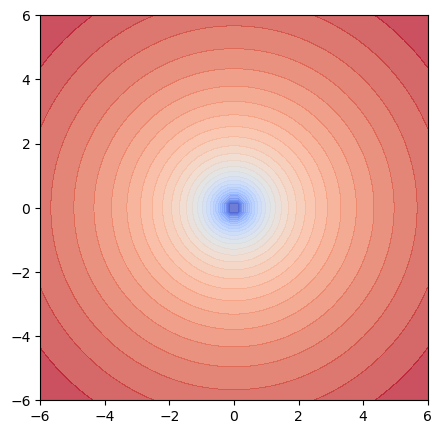

In [9]:
# Let's redefine the loss as a function of theta
def loss(theta):
    return theta[0]**2 + theta[1]**2

plot_contours(loss, (-6, 6), (-6, 6), levels = 30)

In [10]:
# How to extract the value of a scalar tensor
loss(theta).item()

5.0

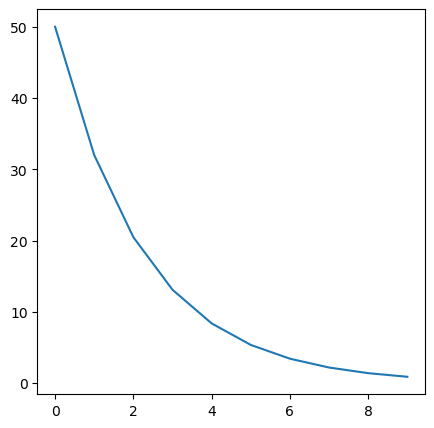

In [11]:
# Basic Gradient Descent
import torch

theta = torch.tensor([5., 5.], requires_grad=True)

lr = .1
n_steps = 10
loss_hist = np.zeros(n_steps)

for i in range(n_steps):
   curr_loss = loss(theta)

   loss_hist[i] = curr_loss.item()

   curr_loss.backward()

   with torch.no_grad():   
        theta -= lr * theta.grad
        
   theta.grad.zero_()

# plot the loss in loss_list
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(loss_hist)

In [12]:
# Keeping track of theta
import torch

theta = torch.tensor([-3., -1.], requires_grad=True)

lr = .1
n_steps = 50
loss_hist = np.zeros(n_steps)
theta_list = [theta.clone()]

for i in range(n_steps):
   curr_loss = loss(theta)
   loss_hist[i] = curr_loss.item()

   curr_loss.backward()

   with torch.no_grad():   
        theta -= lr * theta.grad
        
   theta.grad.zero_()
   theta_list.append(theta.clone())

theta_list[::5] # print every 5th theta

[tensor([-3., -1.], grad_fn=<CloneBackward0>),
 tensor([-0.9830, -0.3277], grad_fn=<CloneBackward0>),
 tensor([-0.3221, -0.1074], grad_fn=<CloneBackward0>),
 tensor([-0.1056, -0.0352], grad_fn=<CloneBackward0>),
 tensor([-0.0346, -0.0115], grad_fn=<CloneBackward0>),
 tensor([-0.0113, -0.0038], grad_fn=<CloneBackward0>),
 tensor([-0.0037, -0.0012], grad_fn=<CloneBackward0>),
 tensor([-0.0012, -0.0004], grad_fn=<CloneBackward0>),
 tensor([-0.0004, -0.0001], grad_fn=<CloneBackward0>),
 tensor([-1.3067e-04, -4.3556e-05], grad_fn=<CloneBackward0>),
 tensor([-4.2817e-05, -1.4272e-05], grad_fn=<CloneBackward0>)]

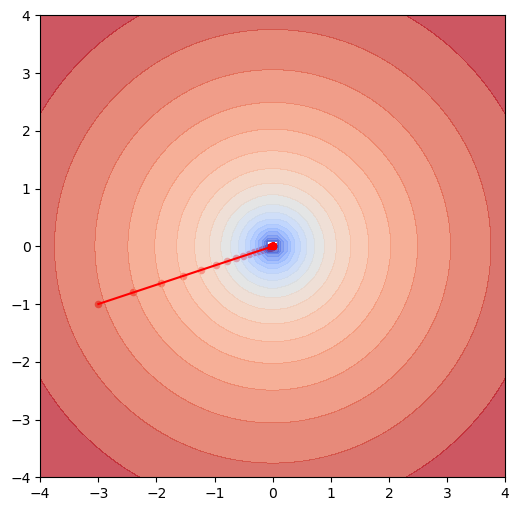

In [13]:
# Concatenate beta_list into a tensor of shape (n_steps+1, 2) and make into a numpy array
theta_tensor = torch.stack(theta_list).detach().numpy()

# Plot a scatter plot of the rows of beta_tensor
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(theta_tensor[:,0], theta_tensor[:,1], s=20, c='r')

# Add line scatter plot of the rows of beta_tensor
ax.plot(theta_tensor[:,0], theta_tensor[:,1], c='r')

# Plot the countours of the loss function
_, cnt = plot_contours(loss, (-4, 4), (-4, 4), ax, levels = 20)



# Linear regression by GD

In [14]:
# Set torch random seed for reproducibility
torch.manual_seed(133)

n_train = 20
# Create a random dataset of size n_train x 2, Gaussian entries
X = torch.randn(n_train, 2)
theta_tru = torch.tensor([1., 3.])

y = X @ theta_tru 

In [15]:
y[1], X[1,:]

(tensor(2.5719), tensor([0.5375, 0.6781]))

$L(\theta) = \frac1n \sum_{i=1}^n (X \theta - y)_i^2 = \frac1n \| X \theta - y\|^2$ 

In [16]:
# Define a quadratic loss function
def loss(theta):
    return torch.mean((X @ theta - y)**2)

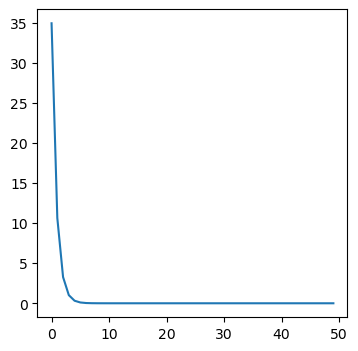

In [17]:
import torch

theta = torch.tensor([3, -3.], requires_grad=True)

lr = .5
n_steps = 50
loss_hist = np.zeros(n_steps)
theta_list = [theta.clone()]

for i in range(n_steps):
   curr_loss = loss(theta)
   loss_hist[i] = curr_loss.item()

   curr_loss.backward()

   with torch.no_grad():   
        theta -= lr * theta.grad
        
   theta.grad.zero_()
   theta_list.append(theta.clone())

# plot the loss in loss_list
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(loss_hist)

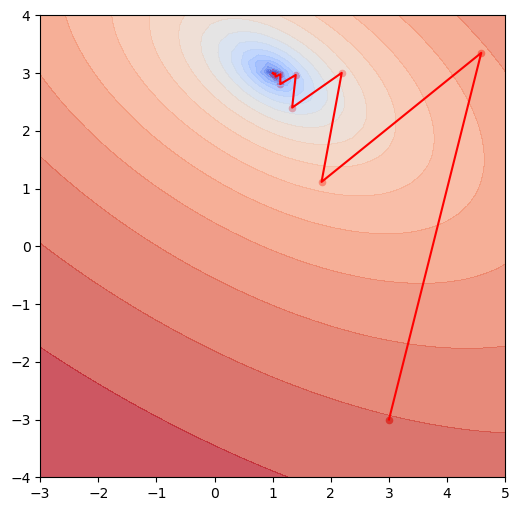

In [18]:
# Concatenate beta_list into a tensor of shape (n_steps+1, 2) and make into a numpy array
theta_tensor = torch.stack(theta_list).detach().numpy()

# Plot a scatter plot of the rows of beta_tensor
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(theta_tensor[:,0], theta_tensor[:,1], s=20, c='r')

# Add line scatter plot of the rows of beta_tensor
ax.plot(theta_tensor[:,0], theta_tensor[:,1], c='r')

# Plot the countours of the loss function
plot_contours(loss, (-3, 5), (-4, 4), ax, levels = 20);

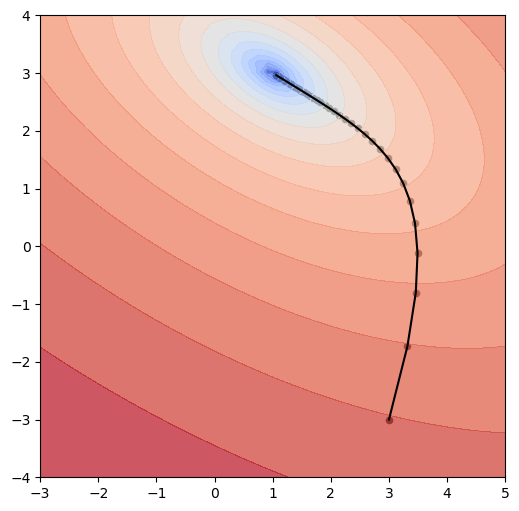

In [459]:
# Put everything into helper functions
%autoreload 2

import torch
from helpers import *
theta = torch.tensor([3, -3.], requires_grad=True)
lr = .1
n_steps = 50

loss_hist, theta_list = our_gd(loss, theta, lr, n_steps)
_ = plot_gd_trajectory(theta_list, loss)